'lp' (Line Profile) Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's create the ParameterSets which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach both these ParameterSets for us.

### components

Line profiles will be computed for each component in which the wavelengths are provided.  If we wanted to expose the line profile for the binary as a whole, we'd set the wavelenghts for `wavelengths@binary`.  If instead we wanted to expose per-star line profiles, we could set the wavelengths for both `wavelengths@primary` and `wavelengths@secondary`.

If you're passing wavelengths to the `b.add_dataset` call, it will default to filling the wavelengths at the *system-level*.  To override this, pass `components=['primary', 'secondary']`, as well.  For example: `b.add_dataset('lp', wavelengths=np.linspace(549,551,101), components=['primary', 'secondary'])`.

### times

Line profiles have an extra dimension than LC and RV datasets which have times as their independent variable.  For that reason, the parameters in the LP dataset are tagged with individual times instead of having a separate times array.  This allows the flux_densities and sigmas to be per-time.  Because of this, times is not a variable, but instead **must** be passed when you call `b.add_dataset`.  At that point, in order to change the times you would need to remove and re-add the dataset.

In [3]:
b.add_dataset('lp', times=[0,1,2], wavelengths=np.linspace(549, 551, 101))
print b.filter(kind='lp')

ParameterSet: 9 parameters
  wavelengths@binary@lp01@dat...: [549.   549.02 549.04 ... 550.96 550.98
 551.  ] nm
  wavelengths@primary@lp01@da...: [] nm
  wavelengths@secondary@lp01@...: [] nm
  00.000000@flux_densities@bi...: [] W / (m2 nm)
  00.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  01.000000@flux_densities@bi...: [] W / (m2 nm)
  01.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  02.000000@flux_densities@bi...: [] W / (m2 nm)
  02.000000@sigmas@binary@lp0...: [] W / (m2 nm)


Here we see that there are three wavelengths Parameters, with the `wavelengths@primary` being filled with the input array (since we didn't override the components or manually pass a dictionary).  Because of this, the flux_densities and sigmas are only visible for the binary component as well. (If we were to fill either of the two other arrays, the corresponding Parameters would become visible as well).  We can see, however, that there is an entry for flux_densities and sigmas for each of the times we passed.

In addition, there are some Parameters in the dataset not related directly to observations.  These include information about the line profile, as well as passband-dependent parameters.

In [4]:
print b.filter(kind='lp_dep')

ParameterSet: 7 parameters
           passband@lp01@dataset: Johnson:V
   intens_weighting@lp01@dataset: energy
       profile_func@lp01@dataset: gaussian
       profile_rest@lp01@dataset: 550.0 nm
         profile_sv@lp01@dataset: 0.0001
    ld_func@primary@lp01@dataset: interp
  ld_func@secondary@lp01@dataset: interp


For information on the passband-dependent parameters, see the section on the [lc dataset](LC) (these are used only to compute fluxes when rv_method=='flux-weighted')

### wavelengths

In [5]:
print b.filter('wavelengths')

ParameterSet: 3 parameters
  wavelengths@binary@lp01@dat...: [549.   549.02 549.04 ... 550.96 550.98
 551.  ] nm
  wavelengths@primary@lp01@da...: [] nm
  wavelengths@secondary@lp01@...: [] nm


In [7]:
print b.get_parameter('wavelengths', component='binary')

Parameter: wavelengths@binary@lp01@dataset
                       Qualifier: wavelengths
                     Description: Wavelengths of the observations
                           Value: [549.   549.02 549.04 ... 550.96 550.98 551.  ] nm
                  Constrained by: 
                      Constrains: None
                      Related to: None



### flux_densities

In [8]:
print b.filter('flux_densities')

ParameterSet: 3 parameters
  00.000000@flux_densities@bi...: [] W / (m2 nm)
  01.000000@flux_densities@bi...: [] W / (m2 nm)
  02.000000@flux_densities@bi...: [] W / (m2 nm)


In [10]:
print b.get_parameter('flux_densities', time=0)

Parameter: 00.000000@flux_densities@binary@lp01@dataset
                       Qualifier: flux_densities
                     Description: Flux density per wavelength (must be same length as wavelengths or empty)
                           Value: [] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



### sigmas

In [11]:
print b.filter('sigmas')

ParameterSet: 3 parameters
  00.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  01.000000@sigmas@binary@lp0...: [] W / (m2 nm)
  02.000000@sigmas@binary@lp0...: [] W / (m2 nm)


In [12]:
print b.get_parameter('sigmas', time=0)

Parameter: 00.000000@sigmas@binary@lp01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on flux_densities
                           Value: [] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



### profile_func

In [13]:
print b.get_parameter('profile_func')

Parameter: profile_func@lp01@dataset
                       Qualifier: profile_func
                     Description: Function to use for the rest line profile
                           Value: gaussian
                         Choices: gaussian, lorentzian



### profile_rest

In [14]:
print b.get_parameter('profile_rest')

Parameter: profile_rest@lp01@dataset
                       Qualifier: profile_rest
                     Description: Rest central wavelength of the profile
                           Value: 550.0 nm
                  Constrained by: 
                      Constrains: None
                      Related to: None



### profile_sv

In [15]:
print b.get_parameter('profile_sv')

Parameter: profile_sv@lp01@dataset
                       Qualifier: profile_sv
                     Description: Subsidiary value of the profile
                           Value: 0.0001
                  Constrained by: 
                      Constrains: None
                      Related to: None



Synthetics
------------------

In [16]:
b.run_compute(irrad_method='none')

<ParameterSet: 4 parameters | qualifiers: wavelengths, flux_densities>

In [17]:
b['lp@model'].twigs

['wavelengths@binary@lp01@phoebe01@latest@lp@model',
 '00.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model',
 '01.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model',
 '02.000000@flux_densities@binary@lp01@phoebe01@latest@lp@model']

The model for a line profile dataset will expose flux-densities at each time and for each component where the corresponding wavelengths Parameter was not empty.  Here since we used the default and exposed line-profiles for the entire system, we have a single entry per-time.

In [19]:
print b.filter('flux_densities', context='model')

ParameterSet: 3 parameters
  00.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
  01.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
  02.000000@flux_densities@la...: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)


In [20]:
print b.get_parameter('flux_densities', context='model', time=0)

Parameter: 00.000000@flux_densities@latest@model
                       Qualifier: flux_densities
                     Description: Flux density per wavelength (must be same length as wavelengths or empty)
                           Value: [1. 1. 1. ... 1. 1. 1.] W / (m2 nm)
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: [time]wavelengths:<notempty>



Plotting
---------------

By default, LP datasets plot as 'flux_densities' vs 'wavelengths' for a **single time**.

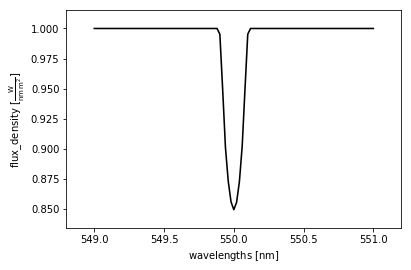

In [24]:
afig, mplfig = b.filter(dataset='lp01', context='model', time=0).plot(show=True)

Mesh Fields
---------------------

Let's add a single mesh and see which columns from the line profile dataset are available to expose as a column in the mesh.

In [25]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [26]:
print b['columns'].choices

['pot', 'rpole', 'volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@lp01', 'normal_intensities@lp01', 'abs_intensities@lp01', 'abs_normal_intensities@lp01', 'boost_factors@lp01', 'ldint@lp01', 'pblum@lp01', 'ptfarea@lp01', 'rvs@lp01']


Since line profiles are passband-dependent, we get all passband-dependent mesh quantities as options.  Additionally, we get `rvs@lp01` (which under-the-hood is being used to determine the doppler shift of the line profile per-element and then summed over the star).  To avoid large amounts of data being stored in the mesh with an extra dimension, the per-element line profiles are never stored, and therefore not able to be exposed to the user.